We want to have a "small" dataset based on the complete data set that we can use to motivate learners.
To motivate learners,
we need to be able to provide them with something meaningful that could ask some "real world" questions
contrained to the knowledge of

- libraries
- functions
- column access

We don't want to require knowledge of

- row access
- group by

at this point.

In [1]:
import pandas

In [2]:
data = pandas.read_csv(
    "data/antibiotics.csv"
)

In [3]:
data.columns

Index(['SHA', 'PCT', 'PRACTICE', 'BNF CODE', 'BNF NAME', 'ITEMS', 'NIC',
       'ACT COST', 'QUANTITY', 'PERIOD'],
      dtype='object')

In [4]:
data["BNF NAME"].unique()

array(['Phenoxymethylpenicillin_Soln 125mg/5ml  ',
       'Phenoxymethylpenicillin_Soln 250mg/5ml  ',
       'Phenoxymethylpenicillin Pot_Tab 250mg   ',
       'Phenoxymethylpenicillin_Soln 125mg/5mlSF',
       'Phenoxymethylpenicillin_Soln 250mg/5mlSF',
       'Fluclox Sod_Cap 250mg                   ',
       'Fluclox Sod_Cap 500mg                   ',
       'Fluclox Sod_Oral Soln 125mg/5ml         ',
       'Fluclox Sod_Oral Soln 250mg/5ml         ',
       'Fluclox Sod_Oral Soln 125mg/5ml S/F     ',
       'Fluclox Sod_Oral Soln 250mg/5ml S/F     ',
       'Amoxicillin_Cap 250mg                   ',
       'Amoxicillin_Cap 500mg                   ',
       'Amoxicillin_Oral Susp 125mg/5ml         ',
       'Amoxicillin_Oral Susp 250mg/5ml         ',
       'Amoxicillin_Oral Susp 125mg/5ml S/F     ',
       'Amoxicillin_Oral Susp 250mg/5ml S/F     ',
       'Co-Amoxiclav_Tab 250mg/125mg            ',
       'Co-Amoxiclav_Susp 250mg/62mg/5ml        ',
       'Co-Amoxiclav_Tab 500mg/

In [5]:
sample = data.loc[
    (data["BNF NAME"] == "Phenoxymethylpenicillin_Soln 125mg/5ml  ") |
    (data["BNF NAME"] == "Phenoxymethylpenicillin Pot_Tab 250mg   ") |
    (data["BNF NAME"] == "Fluclox Sod_Cap 250mg                   ") |
    (data["BNF NAME"] == "Amoxicillin_Cap 250mg                   "),
    :
]

In [6]:
bnf_name_count = pandas.crosstab(sample["BNF NAME"], sample["PERIOD"])
bnf_name_count

PERIOD,201808,201811
BNF NAME,,
Amoxicillin_Cap 250mg,4211,4446
Fluclox Sod_Cap 250mg,6050,5754
Phenoxymethylpenicillin Pot_Tab 250mg,7451,7422
Phenoxymethylpenicillin_Soln 125mg/5ml,4201,5581


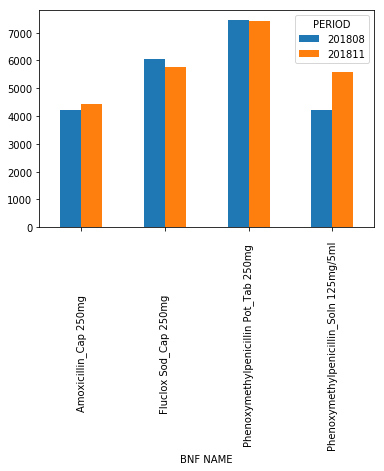

In [7]:
%matplotlib inline

bnf_name_count.plot(kind="bar")

The previous visualisation can answer the question "what antibiotic does have a significant increase in November compared with August?"

In [8]:
sample.to_csv(
    "data/antibiotics-sample.csv",
    index=False
)